In [1]:
%load_ext autoreload
%autoreload 2
import brian2.numpy_ as np
import brian2.only as bb
from brian2 import ms, second, Hz, mV, pA, nS, pF
from matplotlib import pyplot as plt
from tqdm import tqdm
import assemblyseq.assemblyseq as asq

from assemblyseq import plotter
import assemblyseq.calc_spikes as cs


faster_run = True

if faster_run:
    bb.set_device('cpp_standalone', directory='PETH_standalone', build_on_run=False)

In [4]:
asq.__dict__

{'__name__': 'assemblyseq.assemblyseq',
 '__doc__': None,
 '__package__': 'assemblyseq',
 '__loader__': <_frozen_importlib_external.SourceFileLoader at 0x7f8e213f4be0>,
 '__spec__': ModuleSpec(name='assemblyseq.assemblyseq', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7f8e213f4be0>, origin='/Users/fpbatta/src/assembly_sequences/assemblyseq/assemblyseq.py'),
 '__file__': '/Users/fpbatta/src/assembly_sequences/assemblyseq/assemblyseq.py',
 '__cached__': '/Users/fpbatta/src/assembly_sequences/assemblyseq/__pycache__/assemblyseq.cpython-36.pyc',
 '__builtins__': {'__name__': 'builtins',
  '__doc__': "Built-in functions, exceptions, and other objects.\n\nNoteworthy: None is the `nil' object; Ellipsis represents `...' in slices.",
  '__package__': '',
  '__loader__': _frozen_importlib.BuiltinImporter,
  '__spec__': ModuleSpec(name='builtins', loader=<class '_frozen_importlib.BuiltinImporter'>),
  '__build_class__': <function __build_class__>,
  '__import__': <function __i

In [2]:
bb.start_scope()
if faster_run:
    bb.get_device().reinit()
    bb.get_device().activate(build_on_run=False, directory='PETH_standalone')

nn = asq.Nets(Ne=20000, Ni=5000, cp_ee=.01, cp_ie=.01, cp_ei=0.01, cp_ii=.01,
              n_ass=10, s_ass=500, pr=.15, pf=.03, symmetric_sequence=True, p_rev=.03,
              g_ee=0.1 * nS, g_ie=0.1 * nS, g_ei=0.4 * nS, g_ii=0.4 * nS)

initiated  Fri May 15 17:36:35 2020


In [3]:
nn.generate_ps_assemblies('gen_no_overlap')
nn.set_net_connectivity()

nn.set_spike_monitor()
nn.set_rate_monitor()

for gr_num in tqdm(range(nn.n_ass)):
    gr = nn.p_ass_index[0][gr_num]
    t_inp = (20.55 + gr_num * .1) * second
    nn.set_noisy_input(gr, t_inp, sigma=0 * ms)

nn.set_syn_input(nn.p_ass_index[0][0], np.arange(46, 51,1))
nn.balance(10 * second, 5.)
nn.balance(10 * second, 5.)
nn.balance(20 * second, .1)
nn.balance(5 * second, .01)
nn.run_sim(22*second)
# nn.Pe.I -= .0 * pA

A random sequence without overlaps is created


100%|██████████| 10/10 [00:00<00:00, 76.44it/s]

connections imprinted!  Fri May 15 17:36:49 2020


balanced:  0.6449201107025146
balanced:  0.23650193214416504
balanced:  0.23363304138183594
balanced:  0.2296750545501709
run:  0.23654985427856445


In [6]:
%%time
if faster_run:
    bb.device.build(directory='PETH_standalone', compile=True, run=True, debug=False)

CPU times: user 487 ms, sys: 353 ms, total: 840 ms
Wall time: 4min 7s


(0, 1000)

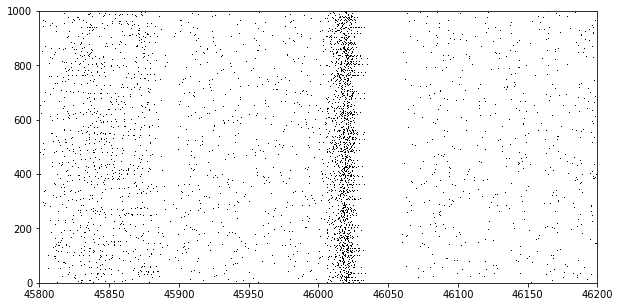

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(nn.mon_spike_e.t/ms, nn.mon_spike_e.i, ',k')
plt.xlim([45800, 46200])
plt.ylim([0, 1000])

<Figure size 720x360 with 0 Axes>

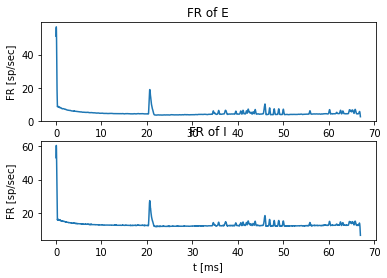

In [16]:
plt.figure(figsize=(10, 5))
plotter.plot_pop_fr(nn)

In [12]:
spikes = cs.get_spike_times_ps(nn, n_ps=0, frac=0.02)

si, st = zip(*spikes)

(45500, 46500)

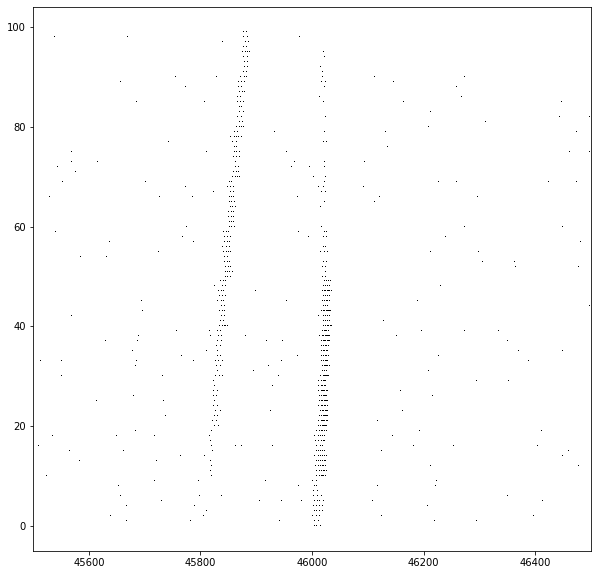

In [18]:
plt.figure(figsize=(10, 10))
plt.plot(st/ms, si, ',k')
plt.xlim([45500, 46500])

In [65]:
set_syn_input(nn, nn.p_ass_index[0][0], 23. * second)

In [59]:
np.array(23.*second)

array(23.)